<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

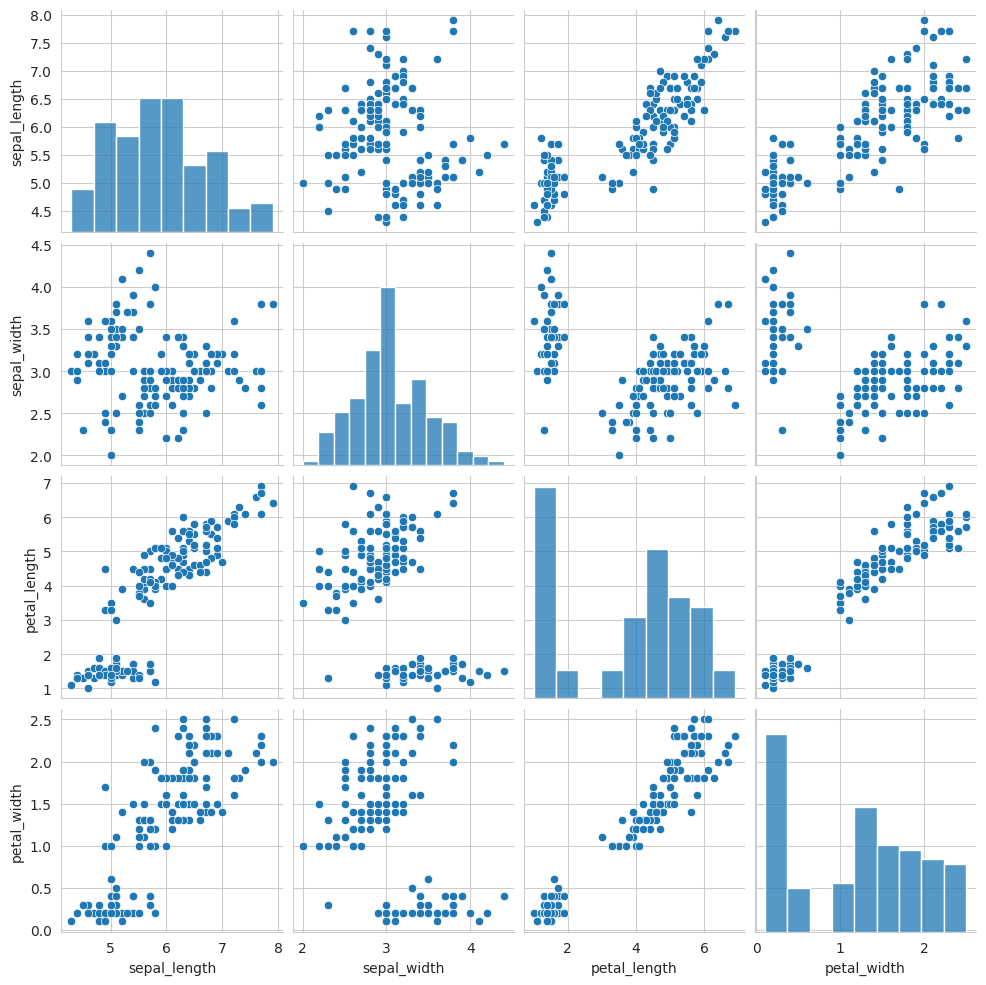

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** ?

O gráfico de pares do conjunto de dados iris revela que alguns atributos são altamente discriminantes para a separação das espécies, especialmente quando se observa a espécie Setosa. Para as espécies Versicolor e Virginica, algumas combinações de atributos não são tão eficazes para diferenciá-las, o que pode requerer técnicas mais avançadas ou atributos adicionais para uma melhor separação. Essa análise visual fornece uma boa base para a escolha de atributos e para as etapas subsequentes de modelagem.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [7]:
# resposta da questão 2.1

import pandas as pd

# Supondo que a base de dados `iris` já esteja carregada
# Se não estiver, carregue-a:
# iris = pd.read_csv('caminho_para_o_arquivo.csv')

# 1. Verificar a presença de valores nulos
valores_nulos = iris.isnull().sum()
print("Valores nulos por coluna antes do tratamento:")
print(valores_nulos)

# 2. Tratar valores nulos

# Opção A: Remover linhas com valores nulos
# iris_sem_nulos = iris.dropna()

# Opção B: Remover colunas com valores nulos
# iris_sem_nulos = iris.dropna(axis=1)

# Opção C: Substituir valores nulos pela média da coluna
# (isso só faz sentido para colunas numéricas)
iris.fillna(iris.mean(), inplace=True)

# Opção D: Substituir valores nulos com um valor específico (exemplo: 0)
# iris.fillna(0, inplace=True)

# 3. Verificar novamente os valores nulos após o tratamento
valores_nulos_restantes = iris.isnull().sum()
print("\nValores nulos por coluna após o tratamento:")
print(valores_nulos_restantes)


Valores nulos por coluna antes do tratamento:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

Valores nulos por coluna após o tratamento:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [9]:
dados_faltantes_iris = iris.isnull().any()
print(dados_faltantes_iris)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
dtype: bool


### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [10]:
# resposta da questão 2.2

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Criando o DataFrame com a base fornecida
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2]
}

iris = pd.DataFrame(data)

# 1. Verificar a necessidade de escalonamento
print("Estatísticas descritivas antes da padronização:")
print(iris.describe())

# 2. Escalonar variáveis numéricas
scaler = StandardScaler()
iris[['sepal_length_std', 'sepal_width_std', 'petal_length_std', 'petal_width_std']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# 3. Exibir o DataFrame com as novas colunas padronizadas
print("\nDataFrame com colunas padronizadas:")
print(iris.head())


Estatísticas descritivas antes da padronização:
       sepal_length  sepal_width  petal_length  petal_width
count      5.000000     5.000000      5.000000          5.0
mean       4.860000     3.280000      1.400000          0.2
std        0.207364     0.258844      0.070711          0.0
min        4.600000     3.000000      1.300000          0.2
25%        4.700000     3.100000      1.400000          0.2
50%        4.900000     3.200000      1.400000          0.2
75%        5.000000     3.500000      1.400000          0.2
max        5.100000     3.600000      1.500000          0.2

DataFrame com colunas padronizadas:
   sepal_length  sepal_width  petal_length  petal_width  sepal_length_std  \
0           5.1          3.5           1.4          0.2          1.293993   
1           4.9          3.0           1.4          0.2          0.215666   
2           4.7          3.2           1.3          0.2         -0.862662   
3           4.6          3.1           1.5          0.2         -1.

In [11]:
# resposta da questão 2.2
# funçao de padronizasao

def padronizando (df_nomecol):

    mean_df = df_nomecol.mean()
    std_df = df_nomecol.std()
    df_nomecol = df_nomecol.apply(lambda n : (n - mean_df) / std_df)

    dt_teste  = df_nomecol
    dt_teste = dt_teste.to_frame()
    dt_teste.columns = [str(col) + '_std' for col in dt_teste.columns ]

    return dt_teste

In [13]:
# aplicando a funcao nas colunas
sl_serie = padronizando(iris['sepal_length'])
sw_serie = padronizando(iris['sepal_width'])
pl_serie = padronizando(iris['petal_length'])
pw_serie = padronizando(iris['petal_width'])

<ipython-input-11-1775c60cd30e>:8: RuntimeWarning: invalid value encountered in scalar divide
  df_nomecol = df_nomecol.apply(lambda n : (n - mean_df) / std_df)


In [14]:
# juntando as colunas padronizadas ao df
df = pd.concat([iris, sl_serie,sw_serie,pl_serie, pw_serie], axis=1)

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [12]:
# resposta da questão 2.3

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Criando o DataFrame com a base fornecida
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2]
}

iris = pd.DataFrame(data)

# 1. Escalonar variáveis numéricas
scaler = StandardScaler()
iris[['sepal_length_std', 'sepal_width_std', 'petal_length_std', 'petal_width_std']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# 2. Descartar colunas originais, mantendo apenas as variáveis preditivas com sufixos _std, _nom e _ord
iris_limpo = iris.filter(regex='_std$|_nom$|_ord$')

# 3. Exibir o DataFrame limpo
print("DataFrame após a limpeza (mantendo apenas colunas com sufixos _std, _nom, _ord):")
print(iris_limpo.head())


DataFrame após a limpeza (mantendo apenas colunas com sufixos _std, _nom, _ord):
   sepal_length_std  sepal_width_std  petal_length_std  petal_width_std
0          1.293993         0.950255          0.000000              0.0
1          0.215666        -1.209416          0.000000              0.0
2         -0.862662        -0.345547         -1.581139              0.0
3         -1.401826        -0.777482          1.581139              0.0
4          0.754829         1.382189          0.000000              0.0


In [15]:
iris_df = df.drop( ['sepal_length','sepal_width','petal_length', 'petal_width'],axis=1)
iris_df.head(n=1)

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,1.293993,0.950255,0.0,0.0,1.157383,0.849934,0.0,NaN


## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

Valores de WCSS para cada número de clusters (de 1 a 5):
[15.0, 6.968355894943891, 2.443162096494271, 0.2386324192988537, 0.0]


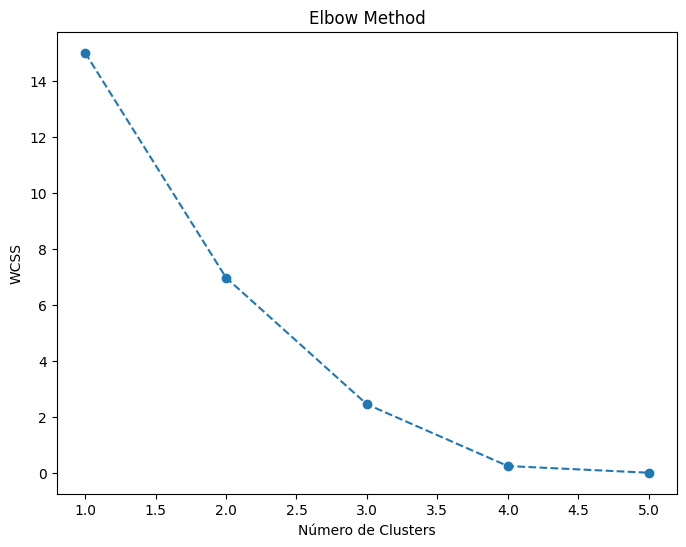

In [17]:
# resposta da questão 3.1

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Criando o DataFrame com a base fornecida
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2]
}

iris = pd.DataFrame(data)

# Escalonar variáveis numéricas
scaler = StandardScaler()
iris[['sepal_length_std', 'sepal_width_std', 'petal_length_std', 'petal_width_std']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Filtrar colunas com sufixo _std para usar no modelo K-means
iris_std = iris.filter(regex='_std$')

# 1. Lista para armazenar os valores de WCSS
wcss = []

# 2. Treinar K-means variando de 1 a 5 clusters (limitado pelo número de amostras)
for i in range(1, 6):  # Mudança aqui: limite de clusters ajustado para 5
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(iris_std)
    wcss.append(kmeans.inertia_)  # WCSS é armazenado em `kmeans.inertia_`

# 3. Exibir a lista de WCSS
print("Valores de WCSS para cada número de clusters (de 1 a 5):")
print(wcss)

# 4. Plotar o gráfico do WCSS em função do número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()



### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

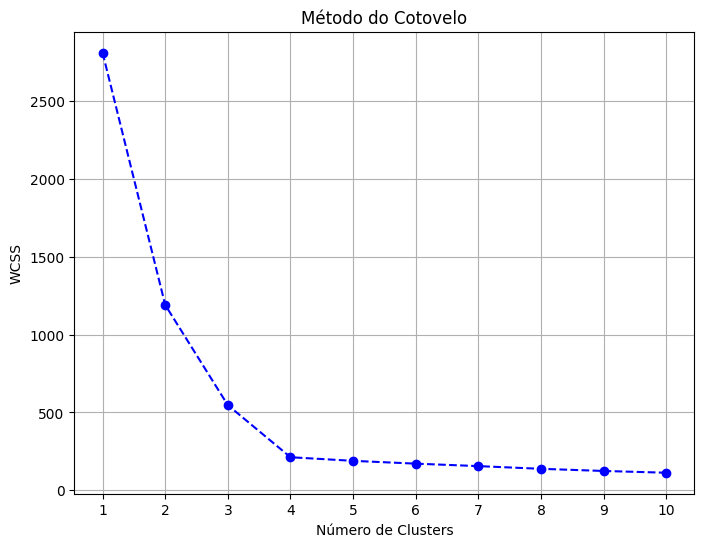

In [20]:
# resposta da questão 3.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Gerar dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calcular WCSS para diferentes números de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Gerar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [21]:
# resposta da questão 3.3.a

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Definir o número final de clusters (suponha que o número de clusters ideal é 3)
num_clusters = 3

# Executar o K-Means com o número de clusters determinado
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Mostrar as primeiras linhas do DataFrame atualizado
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

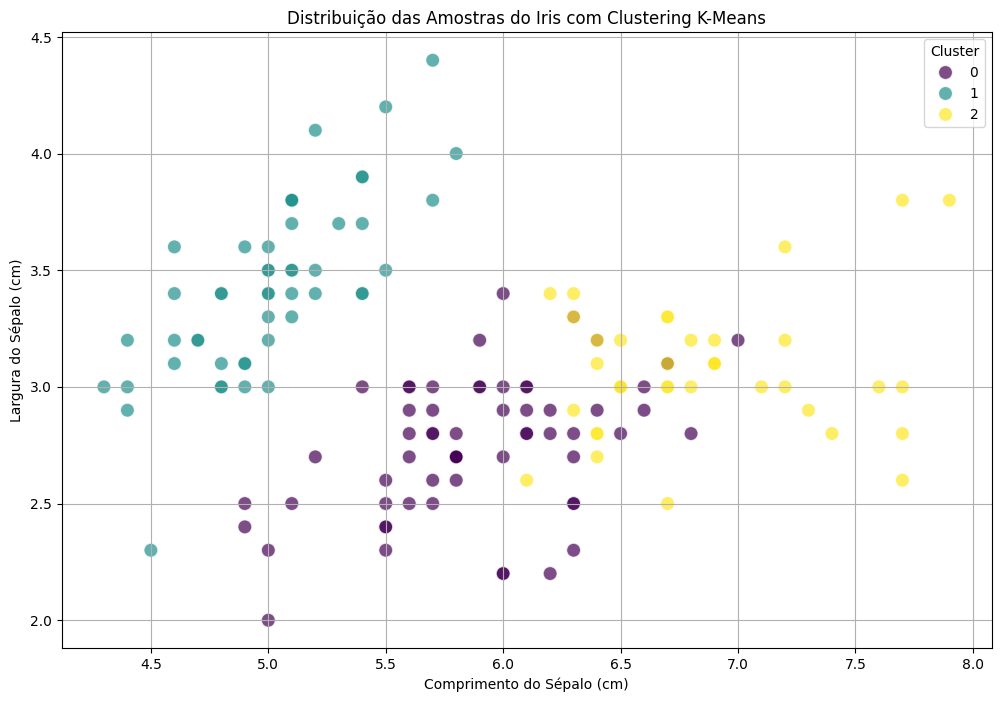

In [22]:
# resposta da questão 3.3.b

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Definir o número final de clusters (suponha que o número de clusters ideal é 3)
num_clusters = 3

# Executar o K-Means com o número de clusters determinado
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Gerar o gráfico de dispersão utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Distribuição das Amostras do Iris com Clustering K-Means')
plt.xlabel('Comprimento do Sépalo (cm)')
plt.ylabel('Largura do Sépalo (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**Comentário:** ?
Se o gráfico mostra três clusters bem separados, isso indica que o K-Means com três clusters está alinhado com o conhecimento prévio do conjunto de dados Iris, e o modelo conseguiu identificar corretamente as diferentes espécies com base nas características fornecidas.

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [23]:
# resposta da questão 4.1

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Definir o número final de clusters (suponha que o número de clusters ideal é 3)
num_clusters = 3

# Executar o K-Means com o número de clusters determinado
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Dados da nova flor
nova_flor = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)

# Predizer o cluster para a nova flor
cluster_predito = kmeans.predict(nova_flor)
print(f'A nova flor seria alocada ao cluster: {cluster_predito[0]}')


A nova flor seria alocada ao cluster: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Comentário sobre a Predição:
A predicação de cluster para a nova flor é baseada nas características fornecidas: comprimento e largura do sépalo, comprimento e largura da pétala. A previsão do cluster indica em qual grupo o modelo K-Means aloca a nova flor com base nas características aprendidas durante o treinamento. Se o número de clusters for 3, e a nova flor se aloca a um cluster específico, você pode analisar a coesão desse cluster com base nas características da flor e compará-lo com as flores conhecidas em cada cluster

---